# Sensitivity of Fold-Change to $F$

© 2019 Griffin Chure. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT).

--- 

In [1]:
import sys
sys.path.insert(0, '../../')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mut.thermo
import mut.viz
pboc = mut.viz.color_selector('pboc')
constants = mut.thermo.load_constants()
mut.viz.plotting_style()

In my analysis, I have found that at the extremes of fold-change the $\Delta F$ is poorly resolved and has aninteresting trend towards $\Delta F = 0$. I think this has something to do with the fact that when you approach the asymptotes of fold-change, the magnitude of the empirical $F$ gets very large. As a reminder, the empirical $F$ can be calculated from the fold-change data as

$$
F_\text{empirical} = \log \left( {1 \over \text{fold-change}} -1\right)
$$

Text(0, 0.5, 'fold-change')

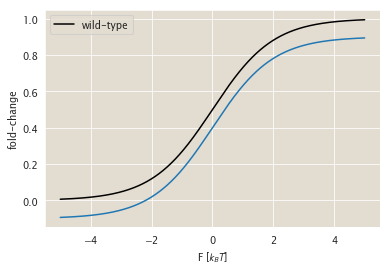

In [266]:
# fold_change = np.logspace(-4, 0, 101)[:-1]
bohr_param_wt = np.linspace(-5, 5, 1000)
bohr_param_mut = bohr_param_wt - 2
delta = -0.1
fc_wt = (1 + np.exp(-bohr_param_wt))**-1
fc_ref_min = (1 + np.exp(-bohr_param_wt))**-1 - delta
fc_ref_max = (1 + np.exp(-bohr_param_wt))**-1 + delta
fc_mut_min = (1 + np.exp(-bohr_param_mut))**-1 - delta
fc_mut_max = (1 + np.exp(-bohr_param_mut))**-1 + delta

plt.plot(bohr_param_wt, fc_wt, 'k-', label='wild-type') 
# plt.fill_between(bohr_param_wt, fc_mut_min, fc_mut_max, color='rebeccapurple', alpha=0.5)
# plt.fill_between(bohr_param_wt, fc_ref_min, fc_ref_max, color='orange', alpha=0.5)
plt.plot(bohr_param_wt, fc_ref_max)
                
plt.legend()
plt.xlabel('F [$k_BT$]')
plt.ylabel('fold-change')


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


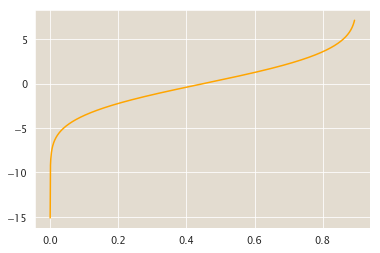

In [267]:
# plt.plot(fc_mut_min, bohr_param_wt + np.log((1/fc_mut_min) - 1),  color='rebeccapurple')
# plt.plot(bohr_param_mut, bohr_param_wt + np.log((1/fc_mut_max) - 1), color='rebeccapurple')
# plt.plot(bohr_param_mut, bohr_param_wt + np.log((1/fc_ref_min) - 1), color='orange') 
plt.plot(fc_ref_max, bohr_param_wt - np.log((1/fc_ref_max) - 1),color='orange')
# plt.plot(fc_mut_, - np.log((1/fc_ref_max)-1) + np.log((1/fc_mut_max) - 1), color='k')
# plt.plot(bohr_param_wt, -np.log((1/fc_ref_min)-1) + np.log((1/fc_mut_min) - 1), color='k')



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


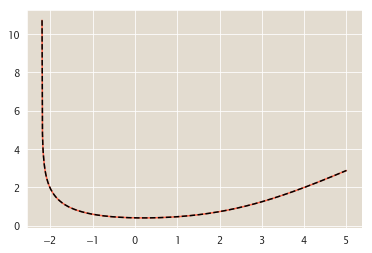

In [269]:
ddf = -np.log(1 + (delta/fc_wt) * (1 / (1 - fc_wt - delta)))
obs_ddf = np.log(1 + (1 / (-1 + (fc_ref_max / delta))) * (1 / (1 - fc_ref_max)))
df = bohr_param_wt + np.log((1/fc_ref_max) - 1)
df_zof =  delta / (fc_ref_max**2 - fc_ref_max)
plt.plot(bohr_param_wt, df,color='tomato')
plt.plot(bohr_param_wt, ddf, '--', color='k')
# plt.plot(fc_ref_max, df - obs_ddf, ':', color='dodgerblue')
# plt.plot(fc_ref_max, df_zof, ':', color='tomato', lw=2)
# plt.plot(fc_ref_max, df - ddf, color='red')
# plt.ylim([-0.001, 0.001])
# plt.yscale('log')

array([           nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan, 4.97318036e+00,
       3.17873394e+00, 2.59590892e+00, 2.24555830e+00, 1.99785746e+00,
       1.80816340e+00, 1.65572923e+00, 1.52921122e+00, 1.42172899e+00,
       1.32879576e+00, 1.24732441e+00, 1.17510110e+00, 1.11048511e+00,
       1.05222744e+00, 9.99355820e-01, 9.51099053e-01, 9.06835507e-01,
       8.66057078e-01, 8.28343375e-01, 7.93342830e-01, 7.60758616e-01,
       7.30337982e-01, 7.01864053e-01, 6.75149447e-01, 6.50031237e-01,
       6.26366948e-01, 6.04031330e-01, 5.82913739e-01, 5.62915999e-01,
      

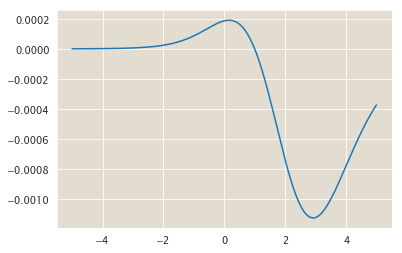

In [150]:
dfc = fc_wt - fc_mut_max
dfc_min = fc_wt - fc_mut_min
dbohr = bohr_param_wt - bohr_param_mut_max
dbohr_min = bohr_param_wt - bohr_param_mut_min
# plt.plot(bohr_param_wt[:-1], np.diff(fc_wt))
# plt.plot(bohr_param_wt[:-1], np.diff(dfc_min))
plt.plot(bohr_param_wt[:-1], np.diff(dfc) * fc_mut_max[:-1])

In [16]:
dfc

array([-5.07380768e-04, -5.17634641e-04, -5.28095610e-04, -5.38767852e-04,
       -5.49655629e-04, -5.60763287e-04, -5.72095262e-04, -5.83656077e-04,
       -5.95450348e-04, -6.07482781e-04, -6.19758179e-04, -6.32281440e-04,
       -6.45057563e-04, -6.58091645e-04, -6.71388885e-04, -6.84954589e-04,
       -6.98794169e-04, -7.12913143e-04, -7.27317142e-04, -7.42011912e-04,
       -7.57003310e-04, -7.72297315e-04, -7.87900022e-04, -8.03817651e-04,
       -8.20056546e-04, -8.36623180e-04, -8.53524152e-04, -8.70766197e-04,
       -8.88356183e-04, -9.06301117e-04, -9.24608146e-04, -9.43284560e-04,
       -9.62337795e-04, -9.81775438e-04, -1.00160522e-03, -1.02183505e-03,
       -1.04247296e-03, -1.06352717e-03, -1.08500605e-03, -1.10691815e-03,
       -1.12927218e-03, -1.15207704e-03, -1.17534179e-03, -1.19907567e-03,
       -1.22328812e-03, -1.24798877e-03, -1.27318742e-03, -1.29889408e-03,
       -1.32511897e-03, -1.35187250e-03, -1.37916529e-03, -1.40700818e-03,
       -1.43541221e-03, -

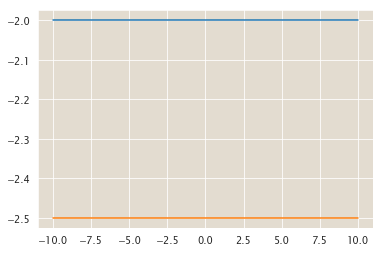

In [10]:
plt.plot(bohr_param_wt, bohr_param_wt - bohr_param_mut_min)
plt.plot(bohr_param_wt, bohr_param_wt - bohr_param_mut_max)


The derivative of $F_\text{empirical}$ with respect to the fold-change is

$$
{d F_\text{empirical} \over d \text{fold-change}} = {1 \over \text{fold-change}(\text{fold-change} -1 )}
$$

In [88]:
df = 1 / (fc_mut_min * (fc_mut_max - 1))

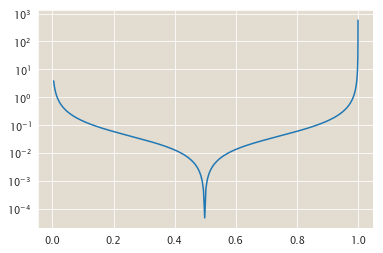

In [89]:
plt.semilogy(fc_mut_max[:-1], np.abs(np.diff(-(fc_mut_max * (fc_mut_max - 1))**-1)) )

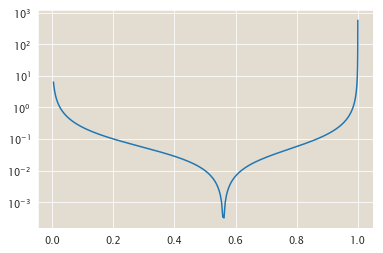

In [96]:
plt.semilogy(fc_mut_max[:-1], np.abs(np.diff(df)))

In [146]:
fc_true = np.logspace(-4, 0, 100)
fc = fc_true -0.015
F_true = -np.log((1 /fc_true) -1)
F_noise = -np.log((1 / fc) - 1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


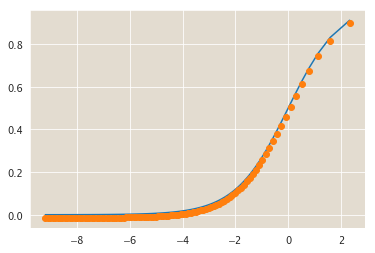

In [147]:
plt.plot(F_true, fc_true)
plt.plot(F_true, fc, 'o')

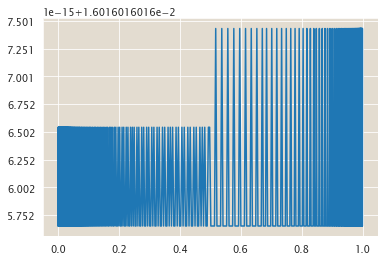

In [150]:
col = (1 + np.exp(-bohr_param))**-1
plt.plot(col[:-1], np.diff(bohr_param))

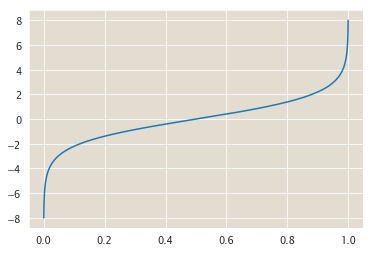

In [151]:
plt.plot(col, bohr_param)

In [152]:
col

array([3.35350130e-04, 3.40762500e-04, 3.46262192e-04, 3.51850614e-04,
       3.57529197e-04, 3.63299395e-04, 3.69162683e-04, 3.75120564e-04,
       3.81174562e-04, 3.87326227e-04, 3.93577132e-04, 3.99928878e-04,
       4.06383089e-04, 4.12941419e-04, 4.19605544e-04, 4.26377170e-04,
       4.33258030e-04, 4.40249884e-04, 4.47354521e-04, 4.54573758e-04,
       4.61909443e-04, 4.69363453e-04, 4.76937693e-04, 4.84634101e-04,
       4.92454646e-04, 5.00401328e-04, 5.08476179e-04, 5.16681265e-04,
       5.25018684e-04, 5.33490567e-04, 5.42099082e-04, 5.50846429e-04,
       5.59734844e-04, 5.68766601e-04, 5.77944008e-04, 5.87269411e-04,
       5.96745194e-04, 6.06373779e-04, 6.16157627e-04, 6.26099239e-04,
       6.36201155e-04, 6.46465957e-04, 6.56896268e-04, 6.67494753e-04,
       6.78264119e-04, 6.89207119e-04, 7.00326548e-04, 7.11625245e-04,
       7.23106099e-04, 7.34772039e-04, 7.46626047e-04, 7.58671150e-04,
       7.70910422e-04, 7.83346990e-04, 7.95984029e-04, 8.08824765e-04,
      